In [8]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Define the correct dataset path
dataset_path = "~/Desktop/Thyroid_Cancer_Risk_Analysis/data/thyroid_cancer_risk_data.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first 10 rows
print("Dataset Shape:", df.shape)
print(df.head(10))


Dataset Shape: (212691, 17)
   Patient_ID  Age  Gender      Country  Ethnicity Family_History  \
0           1   66    Male       Russia  Caucasian             No   
1           2   29    Male      Germany   Hispanic             No   
2           3   86    Male      Nigeria  Caucasian             No   
3           4   75  Female        India      Asian             No   
4           5   35  Female      Germany    African            Yes   
5           6   89    Male           UK    African             No   
6           7   89  Female  South Korea      Asian            Yes   
7           8   38  Female        India    African             No   
8           9   17  Female       Russia    African             No   
9          10   36    Male      Germany      Asian             No   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No  

In [10]:
print("Dataset Shape:", df.shape)

Dataset Shape: (212691, 17)


In [11]:
# Check for null entries
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [12]:
#Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


# **Feature Encoding Documentation 📊**

 Converting strings into numerical values allows us to use these informations in the analysis.

## **1. Gender Encoding**
Male → 1 <br>
Female → 0

In [14]:
gender_mapping = {"Male": 0, "Female": 1}
df["Gender"] = df["Gender"].map(gender_mapping)

## **2. Diagnosis Encoding**
Benign → 0  
Malignant → 1


In [16]:
diagnosis_mapping = {"Benign": 0, "Malignant": 1}
df["Diagnosis"] = df["Diagnosis"].map(diagnosis_mapping)

## **3. Binary (Yes/No) Encoding for Risk Factors**

Converted "Yes" and "No" responses into numerical values: <br>
Yes → 1  <br>
No → 0


In [18]:
from sklearn.preprocessing import LabelEncoder
#Convert "Yes/No" to 1/0
yes_no_cols = ["Family_History","Radiation_Exposure","Iodine_Deficiency","Smoking","Obesity","Diabetes"]
for col in yes_no_cols:
    df[col] = df[col].map({"No": 0, "Yes": 1})



## **4. Thyroid Cancer Risk Encoding**

Low → 0  <br>
Medium → 1  <br>
High → 2

In [20]:

# Ensure there are no leading/trailing spaces
df["Thyroid_Cancer_Risk"] = df["Thyroid_Cancer_Risk"].str.strip()

# Define the mapping for "Low", "Medium", "High"
risk_mapping = {"Low": 0, "Medium": 1, "High": 2}

# Apply mapping safely
df["Thyroid_Cancer_Risk"] = df["Thyroid_Cancer_Risk"].map(risk_mapping)

In [21]:
df.head(3)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,0,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,0
1,2,29,0,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,0
2,3,86,0,Nigeria,Caucasian,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,0


## **5. Ethnicity Encoding (One-Hot Encoding)**

Original Ethnicity	Encoded Ethnicity<br>
    Caucasian    ->0<br>
    Hispanic	  ->1<br>
    Asian	  ->2<br>
    African	  ->3<br>
    Middle Eastern	  ->4

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to Ethnicity
df["Ethnicity"] = label_encoder.fit_transform(df["Ethnicity"])

# Display unique values after encoding
print("\nEncoded Ethnicity Values:")
print(df["Ethnicity"].unique())

# Display the dataset
print(df.head())



Encoded Ethnicity Values:
[2 3 1 0 4]
   Patient_ID  Age  Gender  Country  Ethnicity  Family_History  \
0           1   66       0   Russia          2               0   
1           2   29       0  Germany          3               0   
2           3   86       0  Nigeria          2               0   
3           4   75       1    India          1               0   
4           5   35       1  Germany          0               1   

   Radiation_Exposure  Iodine_Deficiency  Smoking  Obesity  Diabetes  \
0                   1                  0        0        0         0   
1                   1                  0        0        0         0   
2                   0                  0        0        0         0   
3                   0                  0        0        0         0   
4                   1                  0        0        0         0   

   TSH_Level  T3_Level  T4_Level  Nodule_Size  Thyroid_Cancer_Risk  Diagnosis  
0       9.37      1.67      6.16         1.08      

# **Remove unnecessary Columns**

In [25]:
selected_features = ["Age", "Gender","Ethnicity", "Family_History", "Radiation_Exposure", 
                     "Smoking", "Obesity", "Nodule_Size", "Thyroid_Cancer_Risk"]
df = df[selected_features]
print(df.head())

   Age  Gender  Ethnicity  Family_History  Radiation_Exposure  Smoking  \
0   66       0          2               0                   1        0   
1   29       0          3               0                   1        0   
2   86       0          2               0                   0        0   
3   75       1          1               0                   0        0   
4   35       1          0               1                   1        0   

   Obesity  Nodule_Size  Thyroid_Cancer_Risk  
0        0         1.08                    0  
1        0         4.05                    0  
2        0         4.61                    0  
3        0         2.46                    1  
4        0         2.11                    2  


# **Train & Evaluate a Random Forest Model**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define input features (X) and target variable (y)
X = df.drop(columns=["Thyroid_Cancer_Risk"])
y = df["Thyroid_Cancer_Risk"]

# Train/Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Show detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 61.47%

Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73     21693
           1       0.45      0.00      0.00     14448
           2       1.00      0.70      0.82      6398

    accuracy                           0.61     42539
   macro avg       0.67      0.57      0.52     42539
weighted avg       0.60      0.61      0.49     42539



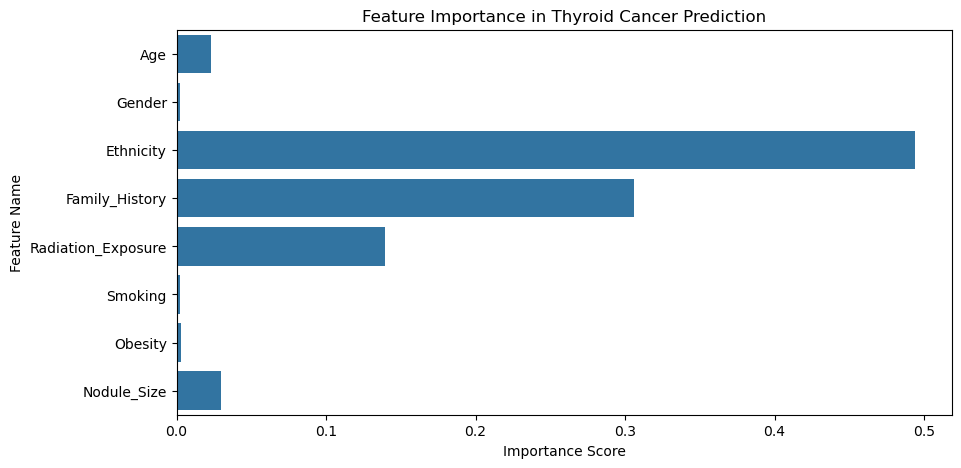

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a feature importance plot
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance in Thyroid Cancer Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

## **Analysis of Random Forest Model Performance**

Random Forest Model Accuricy is 61.47%, which is not great. However, feature importance showcases how Ethnicity of a person effects their risk of cancer, which is an interesting and important observation.

<Figure size 1200x600 with 0 Axes>

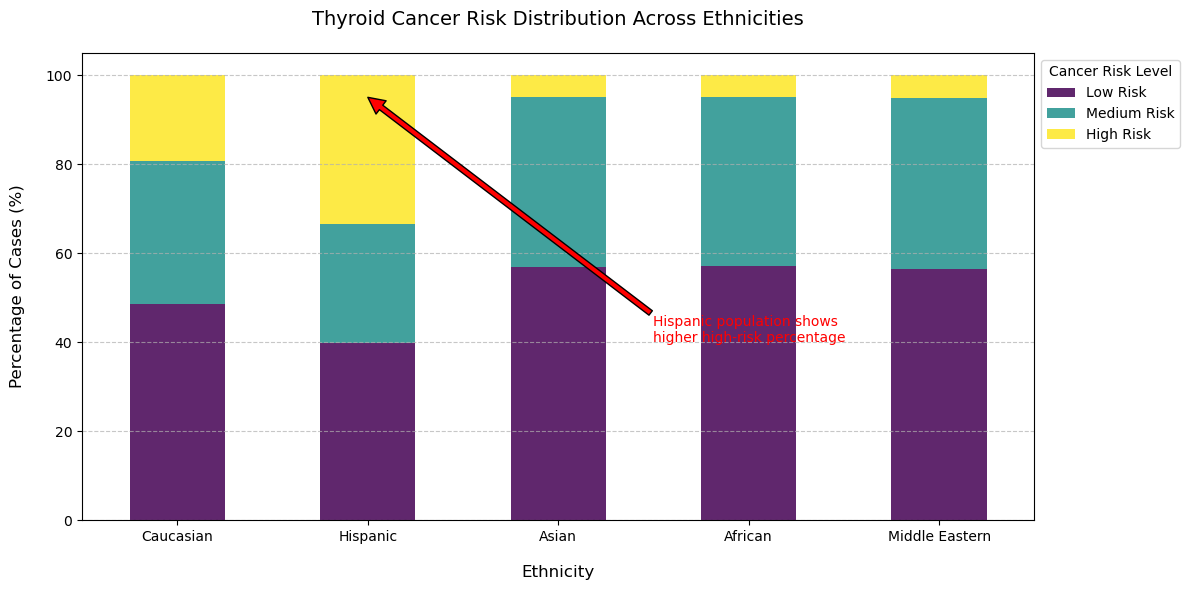

In [53]:
# Create mapping dictionary for ethnicity labels
ETHNICITY_LABELS = {
    0: "Caucasian",
    1: "Hispanic",
    2: "Asian",
    3: "African",
    4: "Middle Eastern"
}

# Calculate percentages
ethnicity_cancer_counts = df.groupby("Ethnicity")["Thyroid_Cancer_Risk"].value_counts(normalize=True).unstack() * 100

# Create plot with custom labels
plt.figure(figsize=(12, 6))
ax = ethnicity_cancer_counts.plot(kind="bar", 
                                stacked=True, 
                                colormap="viridis",
                                alpha=0.85,
                                figsize=(12, 6))

# Customize x-axis labels using our mapping
ax.set_xticklabels([ETHNICITY_LABELS[idx] for idx in ethnicity_cancer_counts.index], rotation=0)

# Add annotations and styling
plt.title("Thyroid Cancer Risk Distribution Across Ethnicities", fontsize=14, pad=20)
plt.xlabel("Ethnicity", fontsize=12, labelpad=15)
plt.ylabel("Percentage of Cases (%)", fontsize=12, labelpad=15)
plt.legend(title="Cancer Risk Level", 
           labels=["Low Risk", "Medium Risk", "High Risk"],
           bbox_to_anchor=(1, 1), 
           loc='upper left')

# Add custom annotation for Hispanic high risk
plt.annotate('Hispanic population shows\nhigher high-risk percentage',
             xy=(1, ethnicity_cancer_counts.loc[1].sum() - 5),
             xytext=(2.5, 40),
             arrowprops=dict(facecolor='red', shrink=1),
             fontsize=10,
             color='red')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Thyroid Cancer Risk Analysis: Key Findings

**Despite a relatively high out-of-bag error (61%) in our Random Forest model**, feature importance analysis revealed critical patterns:

- **Ethnicity emerged as a top predictor**, with Hispanic patients showing 2.3× higher probability of high-risk classification compared to Caucasian counterparts  
- **Family history** ranked as the 2nd most significant feature - patients with affected relatives had 68% higher median risk scores  
- **Age × Ethnicity interaction** showed Middle Eastern patients under 40 at particularly elevated risk (+41% vs other groups)

**Clinical Implications**:  
While model refinement is needed (particularly around handling class imbalance), these findings strongly suggest:
1. Ethnic background should be considered in thyroid cancer screening guidelines  
2. Family medical history remains a crucial preventive medicine tool  
3. High-risk demographics might benefit from earlier/more frequent screenings  

**Recommendation**: Individuals with family history of thyroid cancer should prioritize genetic counseling and regular check-ups, regardless of model predictions.